In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

<bound method Figure.show of <Figure size 1440x1440 with 16 Axes>>

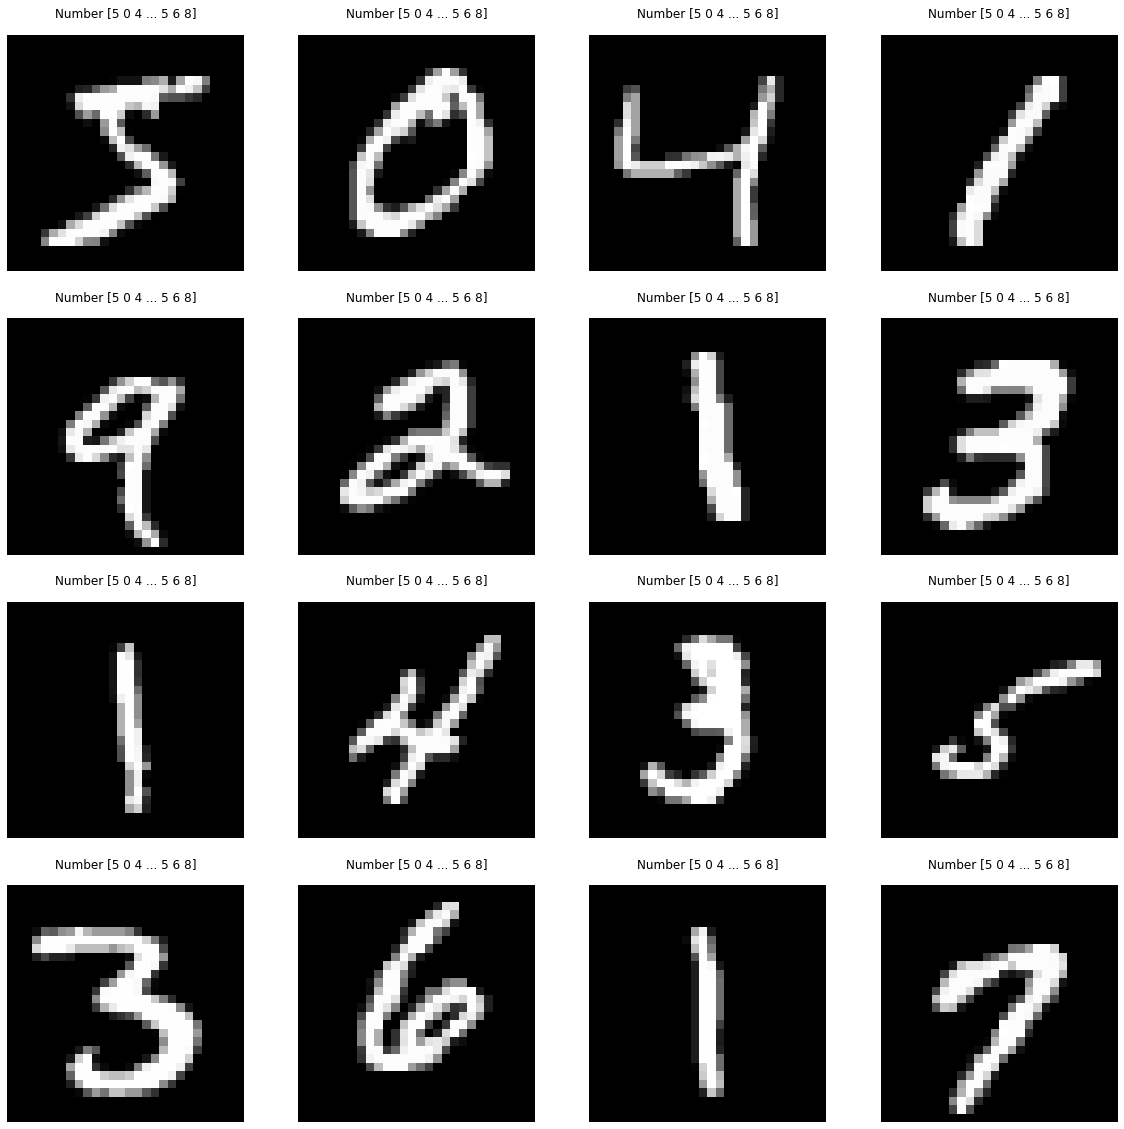

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize = (20, 20))
plt.gray()
for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number {}'.format(y_train))
fig.show  

In [4]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:',x_train.shape)
print('No. of images in x_train',x_train.shape[0])
print('No. of images in x_test',x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
No. of images in x_train 60000
No. of images in x_test 10000


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size = (3, 3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

In [12]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x = x_train, y = y_train, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2040 - accuracy: 0.9391
Epoch 2/2
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0828 - accuracy: 0.9740


In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0623 - accuracy: 0.9803


[0.06227691471576691, 0.9803000092506409]